In [ ]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
from google.colab import files

# Upload the file
uploaded = files.upload()

# Assuming the uploaded file is 'data.csv'
file_name = 'online_courses_uses.csv'


# Read the CSV file using pandas
df = pd.read_csv(file_name)
print(df.head())

Saving online_courses_uses.csv to online_courses_uses (1).csv
   Course_ID Course_Name      Category  Duration (hours)  Enrolled_Students  \
0          1    Course_1  Office Tools                21               4217   
1          2    Course_2  Office Tools                57               4238   
2          3    Course_3    Technology                52               2700   
3          4    Course_4  Office Tools                69               4308   
4          5    Course_5    Technology                43               4792   

   Completion_Rate (%)           Platform   Price ($)  Rating (out of 5)  
0            50.646827           Coursera   38.797425           4.811252  
1            82.240240                edX  160.650991           3.829329  
2            55.729028  LinkedIn Learning  123.503781           4.851950  
3            58.664729  LinkedIn Learning  116.775704           3.913732  
4            62.598147              Udemy   96.246696           4.921968  


In [ ]:
df.head()

,Course_ID,Course_Name,Category,Duration (hours),Enrolled_Students,Completion_Rate (%),Platform,Price ($),Rating (out of 5)
0,1,Course_1,Office Tools,21,4217,50.646827,Coursera,38.797425,4.811252
1,2,Course_2,Office Tools,57,4238,82.240240,edX,160.650991,3.829329
2,3,Course_3,Technology,52,2700,55.729028,LinkedIn Learning,123.503781,4.851950
3,4,Course_4,Office Tools,69,4308,58.664729,LinkedIn Learning,116.775704,3.913732
4,5,Course_5,Technology,43,4792,62.598147,Udemy,96.246696,4.921968


Checking the counts of each Course Category

In [ ]:
df['Category'].value_counts()


,count
Category,
Business,1148
Office Tools,1139
Marketing,1126
Finance,1124
Design,1112
AI,1104
Data Science,1098
Programming,1076
Technology,1073


Duration of each course by hours

In [ ]:
df.groupby(["Category"]).agg({"Duration (hours)": ["sum"]})


,Duration (hours)
,sum
Category,
AI,61211
Business,63294
Data Science,59652
Design,61694
Finance,63150
Marketing,62160
Office Tools,63592
Programming,57182


Students enrolled in each course category

In [ ]:
df.groupby(["Category"]).agg({"Enrolled_Students": ["sum"]})


,Enrolled_Students
,sum
Category,
AI,2809869
Business,2848578
Data Science,2734806
Design,2783497
Finance,2892437
Marketing,2949738
Office Tools,2882713
Programming,2676599


Checking Nulls in data

In [ ]:
df.isnull().sum()

,0
Course_ID,0
Course_Name,0
Category,0
Duration (hours),0
Enrolled_Students,0
Completion_Rate (%),0
Platform,0
Price ($),0
Rating (out of 5),0


Information And Desctiption of data

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Course_ID            10000 non-null  int64  
 1   Course_Name          10000 non-null  object 
 2   Category             10000 non-null  object 
 3   Duration (hours)     10000 non-null  int64  
 4   Enrolled_Students    10000 non-null  int64  
 5   Completion_Rate (%)  10000 non-null  float64
 6   Platform             10000 non-null  object 
 7   Price ($)            10000 non-null  float64
 8   Rating (out of 5)    10000 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 703.2+ KB


Description of data

In [ ]:
df.describe()


,Course_ID,Duration (hours),Enrolled_Students,Completion_Rate (%),Price ($),Rating (out of 5)
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,55.144000,2530.653000,75.119729,106.391332,3.994154
std,2886.89568,26.199242,1423.808243,14.462138,55.100685,0.575502
min,1.00000,10.000000,101.000000,50.008183,10.037145,3.000026
25%,2500.75000,32.000000,1289.000000,62.629516,58.613731,3.490250
50%,5000.50000,55.000000,2532.000000,75.156568,108.042392,4.002789
75%,7500.25000,78.000000,3764.000000,87.595268,153.945558,4.483662
max,10000.00000,100.000000,5000.000000,99.994300,199.962412,4.999176


Price analysis of each course

In [ ]:
df.groupby(["Category"]).agg({"Price ($)": ["sum"]}).sort_values(by=[("Price ($)", "sum")], ascending=False)

,Price ($)
,sum
Category,
Office Tools,122991.396993
Data Science,120967.394358
Finance,120011.033173
Design,118670.297751
Marketing,118658.752699
Programming,117795.769825
Business,117668.974226
AI,115583.388028


In [ ]:
df.groupby(["Category"]).agg({"Price ($)": ["mean"]}).sort_values(by=[("Price ($)", "mean")], ascending=False)

,Price ($)
,mean
Category,
Data Science,110.170669
Programming,109.475623
Office Tools,107.981911
Finance,106.771382
Design,106.717894
Marketing,105.380775
AI,104.695098
Technology,103.976057


In [ ]:
df.groupby(["Category"]).agg({"Completion_Rate (%)": ["mean"]}).sort_values(by=[("Completion_Rate (%)", "mean")], ascending=False)

,Completion_Rate (%)
,mean
Category,
Programming,75.632548
Design,75.429409
Data Science,75.343010
Finance,75.235829
Technology,75.160604
AI,75.011716
Business,74.972451
Marketing,74.691278


In [ ]:
df.head()


,Course_ID,Course_Name,Category,Duration (hours),Enrolled_Students,Completion_Rate (%),Platform,Price ($),Rating (out of 5)
0,1,Course_1,Office Tools,21,4217,50.646827,Coursera,38.797425,4.811252
1,2,Course_2,Office Tools,57,4238,82.240240,edX,160.650991,3.829329
2,3,Course_3,Technology,52,2700,55.729028,LinkedIn Learning,123.503781,4.851950
3,4,Course_4,Office Tools,69,4308,58.664729,LinkedIn Learning,116.775704,3.913732
4,5,Course_5,Technology,43,4792,62.598147,Udemy,96.246696,4.921968


Which Course has highest duration?

In [ ]:
maxPrice=df[df["Price ($)"]==df["Price ($)"].max()]
print(maxPrice.iloc[0]["Course_Name"])

Course_8493


Which course has higest students enrolled?

In [ ]:
maxStudents=df[df["Enrolled_Students"]==df["Enrolled_Students"].max()]
print(maxStudents.iloc[0]["Course_Name"])

Course_2565


Which Course has highest completion rate?

In [ ]:
maxCompletion=df[df["Completion_Rate (%)"]==df["Completion_Rate (%)"].max()]
print(maxCompletion.iloc[0]["Course_Name"])

Course_340


Number of courses each platforms has ?

In [ ]:
df.groupby(["Platform"]).agg({"Course_Name": ["count"]}).sort_values(by=[("Course_Name", "count")], ascending=False)

,Course_Name
,count
Platform,
Udemy,2554
LinkedIn Learning,2501
edX,2479
Coursera,2466


Which platforms has highest completion rates?

In [ ]:
df.groupby(["Platform"]).agg({"Completion_Rate (%)": ["mean"]}).sort_values(by=[("Completion_Rate (%)", "mean")], ascending=False)

,Completion_Rate (%)
,mean
Platform,
edX,75.336501
Udemy,75.098761
LinkedIn Learning,75.080557
Coursera,74.963258


Which Platforms recieve the highest ratings?

In [ ]:
df.groupby(["Platform"]).agg({"Rating (out of 5)": ["mean"]}).sort_values(by=[("Rating (out of 5)", "mean")], ascending=False)

,Rating (out of 5)
,mean
Platform,
edX,4.004033
Coursera,3.999942
Udemy,3.999519
LinkedIn Learning,3.973175


Which Platforms get more students

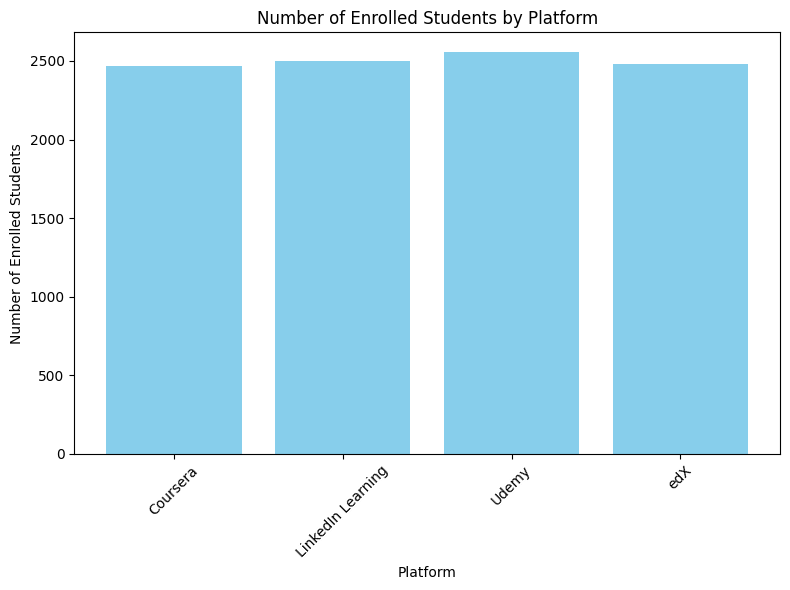

In [ ]:
import matplotlib.pyplot as plt
df_students = df.groupby('Platform').agg(Enrolled_Students_Count=('Enrolled_Students', 'count')).reset_index()
plt.figure(figsize=(8, 6))
plt.bar(df_students["Platform"],df_students["Enrolled_Students_Count"], color='skyblue')
plt.xlabel('Platform')
plt.ylabel('Number of Enrolled Students')
plt.title('Number of Enrolled Students by Platform')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Average ratings of the platforms with respect of ratings

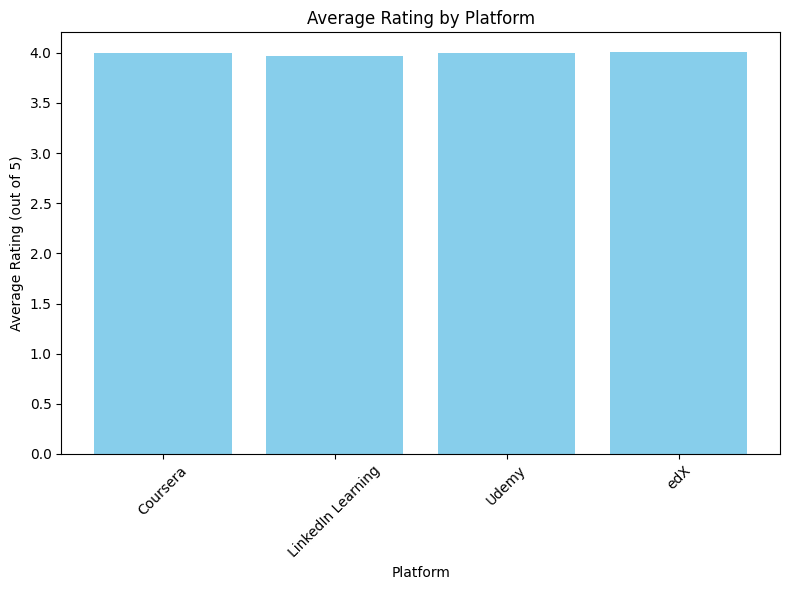

In [ ]:
import matplotlib.pyplot as plt
df_students = df.groupby('Platform').agg(ratings=('Rating (out of 5)', 'mean')).reset_index()
plt.figure(figsize=(8, 6))
plt.bar(df_students["Platform"], df_students["ratings"], color='skyblue')
plt.xlabel('Platform')
plt.ylabel('Average Rating (out of 5)')  # Update the ylabel
plt.title('Average Rating by Platform')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Distribution of hours with respect to platforms

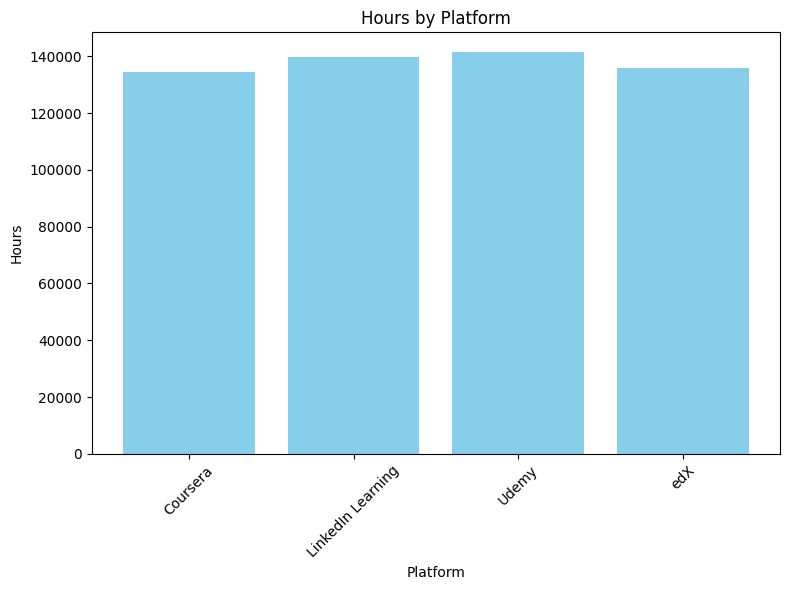

In [ ]:
df.head()
import matplotlib.pyplot as plt
df_students = df.groupby('Platform').agg(hours=('Duration (hours)', 'sum')).reset_index()
plt.figure(figsize=(8, 6))
plt.bar(df_students["Platform"], df_students["hours"], color='skyblue')
plt.xlabel('Platform')
plt.ylabel('Hours')  # Update the ylabel
plt.title('Hours by Platform')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df.head()


,Course_ID,Course_Name,Category,Duration (hours),Enrolled_Students,Completion_Rate (%),Platform,Price ($),Rating (out of 5)
0,1,Course_1,Office Tools,21,4217,50.646827,Coursera,38.797425,4.811252
1,2,Course_2,Office Tools,57,4238,82.240240,edX,160.650991,3.829329
2,3,Course_3,Technology,52,2700,55.729028,LinkedIn Learning,123.503781,4.851950
3,4,Course_4,Office Tools,69,4308,58.664729,LinkedIn Learning,116.775704,3.913732
4,5,Course_5,Technology,43,4792,62.598147,Udemy,96.246696,4.921968
